## **Area Analysis**

This notebook is used to analyse the area distribution of flakes in the dataset.

In [2]:
import cv2
import os
import sys
import json
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd


ROOT_DIR = os.path.abspath(os.path.join('../../'))
sys.path.append(ROOT_DIR)

BEP_DIR = os.path.abspath("../../../")
FIGS_DIR = os.path.join(BEP_DIR, 'paper_images')

res = 0.048000000000000001 # um / pixel

plt.rcParams['font.family'] = 'Times New Roman'

Polygon


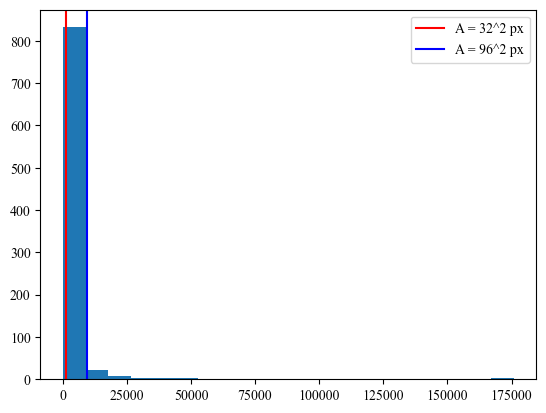

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


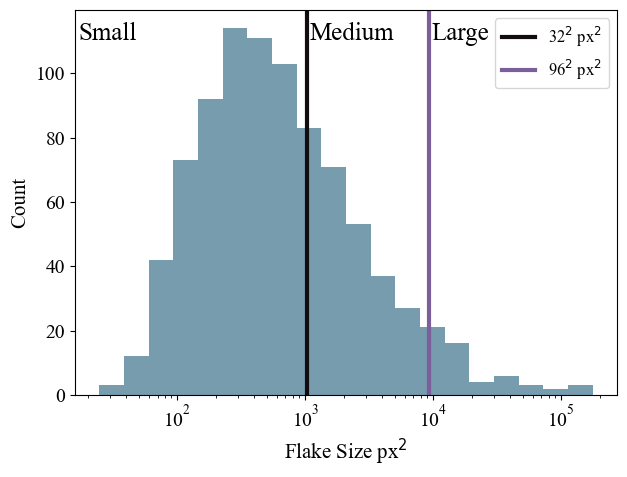

In [22]:
def generate_bbox(polygon: list):
    """Function to generate the bbox from a polygon object."""
    x = [point["x"] for point in polygon]
    y = [point["y"] for point in polygon]
    bbox = [min(x), min(y), max(x) - min(x), max(y) - min(y)]
    
    return bbox

def calc_area_polygon(polygon: list):
    x_coords = [point["x"] for point in polygon]
    y_coords = [point["y"] for point in polygon]

    return 0.5 * abs(sum(x_coords[i] * y_coords[i+1] - y_coords[i] * x_coords[i+1] for i in range(len(x_coords) - 1)))

def calc_areas(data: str = 'data_simp_afm', bs: bool = True):
    # batches = [
    #     i 
    #     for i in os.listdir(os.path.join(ROOT_DIR, data, 'images'))
    #     if ('batch' in  i and (i != 'batchsplit'))
    # ]

    batches = ['train', 'val', 'test']

    if bs:
        batches = [i+'_bs' for i in batches]

    img_dir = os.path.join(ROOT_DIR, data, 'images')
    ann_dir = os.path.join(ROOT_DIR, data, 'annotations')

    rows = []
    for batch in batches:
        if (
            os.path.exists(os.path.join(ann_dir, batch+'.ndjson'))
        ):
            with open(os.path.join(ann_dir, batch+'.ndjson')) as f:
                rows += [json.loads(l.replace('\'', '\"')) for l in f.readlines()]
        else:
            print(f'{batch} did not have a .ndjson file')

    areas_bbox = []
    areas_polygon = []

    for row in rows:
        for label in list(row['projects'].values())[0]['labels']:
            for obj in label['annotations']['objects']:
                bbox = generate_bbox(obj['polygon'])

                x_coords = [point["x"] for point in obj['polygon']]
                y_coords = [point["y"] for point in obj['polygon']]

                areas_bbox.append(bbox[2]*bbox[3])
                areas_polygon.append(calc_area_polygon(obj['polygon']))

    return areas_bbox, areas_polygon

def plot_hist(data: list, bins: int):

    plt.figure()
    _, bins, _ = plt.hist(data, bins=bins)
    plt.axvline(32**2, c = 'red', label='A = 32^2 px')
    plt.axvline(96**2, c = 'blue', label='A = 96^2 px')
    plt.legend()
    plt.show()

    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.figure(figsize=(7, 5))
    plt.hist(data, bins=logbins, color='#769cae')

    axis_label_fontsize = 15
    tick_label_fontsize = 14
    legend_fontsize = 12


    plt.xlabel(r'Flake Size px$^2$', fontsize=axis_label_fontsize)
    plt.ylabel('Count', fontsize=axis_label_fontsize)
    plt.xticks(fontsize=tick_label_fontsize)
    plt.yticks(fontsize=tick_label_fontsize)

    plt.xscale('log')

    plt.axvline(32**2, c = '#120c0d', label=r'32$^2$ px$^2$', lw=3)
    plt.axvline(96**2, c = '#7a5f9b', label=r'96$^2$ px$^2$', lw = 3)

    plt.figtext(0.13, 0.82, 'Small', size=18)
    plt.figtext(0.46, 0.82, 'Medium', size=18)
    plt.figtext(0.635, 0.82, 'Large', size=18)

    plt.legend(fontsize=legend_fontsize)
    plt.savefig(os.path.join(FIGS_DIR, 'Flake_area_dist.eps'), bbox_inches='tight')
    plt.show()

    return None

areas_bbox, areas_polygon = calc_areas('data_simp_afm', True)

bins = 20

# print('BBOX')
# plot_hist(areas_bbox, bins)
print('Polygon')
plot_hist(areas_polygon, bins)

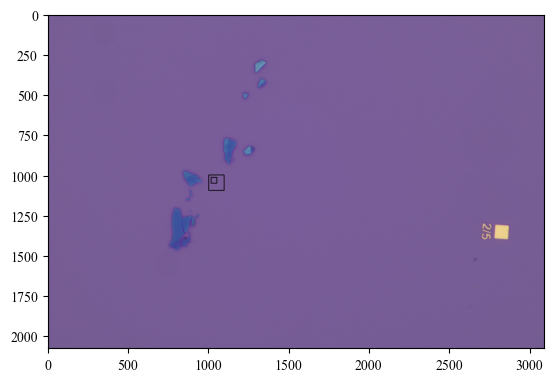

In [4]:
image = os.path.join(ROOT_DIR, 'data_simp_afm', 'images', 'train', '02_michiel_sio2_NbSe2_f2-D1-25-100x.png')
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# sc = (500,500)
sc = (0,0)
as_ = [32,96]

coords = ()
# cv2.rectangle(image, (sc[0], sc[1]), (sc[0]+as_[0], sc[1]+as_[0]), color=5, thickness=3)
# cv2.rectangle(image, (sc[0], sc[1]), (sc[0]+as_[1], sc[1]+as_[1]), color=5, thickness=3)

cv2.rectangle(image, (1015, 1015), (1051, 1051), color=5, thickness=3)
cv2.rectangle(image, (1000, 1000), (1096, 1096), color=5, thickness=3)

plt.figure()
plt.imshow(image)
# plt.imshow(image[:100,:100])
plt.show()